In [1]:
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt

%matplotlib inline

Datasets found on [data.worldbank.org](https://data.worldbank.org/)  
- [World Population](https://data.worldbank.org/indicator/SP.POP.TOTL?locations=GR)
- [World GDP](https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?locations=GR)

# Data reading  
___

In [2]:
pop_data = pd.read_csv("world_pop.csv")
gdp_data = pd.read_csv("world_gdp.csv")

In [3]:
pop_data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,"Population, total",SP.POP.TOTL,54208.0,55434.0,56234.0,56699.0,57029.0,57357.0,...,102565.0,103165.0,103776.0,104339.0,104865.0,105361.0,105846.0,106310.0,106766.0,NaN
1,Africa Eastern and Southern,AFE,"Population, total",SP.POP.TOTL,130836765.0,134159786.0,137614644.0,141202036.0,144920186.0,148769974.0,...,547482863.0,562601578.0,578075373.0,593871847.0,609978946.0,626392880.0,643090131.0,660046272.0,677243299.0,NaN
2,Afghanistan,AFG,"Population, total",SP.POP.TOTL,8996967.0,9169406.0,9351442.0,9543200.0,9744772.0,9956318.0,...,31161378.0,32269592.0,33370804.0,34413603.0,35383028.0,36296111.0,37171922.0,38041757.0,38928341.0,NaN


In [4]:
gdp_data.head(3)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,GDP (current US$),NY.GDP.MKTP.CD,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,GDP (current US$),NY.GDP.MKTP.CD,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,GDP (current US$),NY.GDP.MKTP.CD,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN


Parsing greek population & GDP

In [5]:
gr_pop = pop_data.loc[pop_data["Country Name"] == "Greece"]
gr_gdp = gdp_data.loc[gdp_data["Country Name"] == "Greece"]

The dataframes are melted, so that the "year" columns, become row values of a single "year" column

In [6]:
gr_pop = gr_pop.melt()
gr_pop.columns = ["year", "population"]

gr_gdp = gr_gdp.melt()
gr_gdp.columns = ["year", "gdp"]

Merging dataframes

In [7]:
gr_gdp.drop("year", axis="columns", inplace=True)
df = pd.concat([gr_pop, gr_gdp], axis="columns")
df

,year,population,gdp
0,Country Name,Greece,Greece
1,Country Code,GRC,GRC
2,Indicator Name,"Population, total",GDP (current US$)
3,Indicator Code,SP.POP.TOTL,NY.GDP.MKTP.CD
4,1960,8331725.0,4335186016.83942
...,...,...,...
61,2017,10754679.0,199350781053.184998
62,2018,10732882.0,211945897765.431
63,2019,10721582.0,205144152830.846985
64,2020,10715549.0,188835201625.910004


# Data cleaning  
___

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        66 non-null     object
 1   population  65 non-null     object
 2   gdp         65 non-null     object
dtypes: object(3)
memory usage: 1.7+ KB


Dropping rows with NaN values (the last one) as well as the first 4 rows

In [9]:
df.drop(range(4), inplace=True)
df.dropna(inplace=True)
df.index = range(df.shape[0])
df

,year,population,gdp
0,1960,8331725.0,4335186016.83942
1,1961,8398050.0,4961400439.31722
2,1962,8448233.0,5213047711.42704
3,1963,8479625.0,5895278024.09202
4,1964,8510429.0,6669673257.1183
...,...,...,...
56,2016,10775971.0,193017030649.700012
57,2017,10754679.0,199350781053.184998
58,2018,10732882.0,211945897765.431
59,2019,10721582.0,205144152830.846985


To make the data more readable:  
- Population can be described in millions
- GDP can be described in billions  

Cast the clean data to their appropriate data types in the process

In [10]:
df.rename({"population": "pop_in_mil", "gdp": "gdp_in_bil"}, axis="columns", inplace=True)

df["year"] = df["year"].astype(np.uint16)
df["pop_in_mil"] = (df["pop_in_mil"] / 1e6).astype(np.float64)
df["gdp_in_bil"] = (df["gdp_in_bil"] / 1e9).astype(np.float64)

df.head()

,year,pop_in_mil,gdp_in_bil
0,1960,8.331725,4.335186
1,1961,8.398050,4.961400
2,1962,8.448233,5.213048
3,1963,8.479625,5.895278
4,1964,8.510429,6.669673


# Data visualisation  
___

Text(0, 0.5, 'USD in billions')

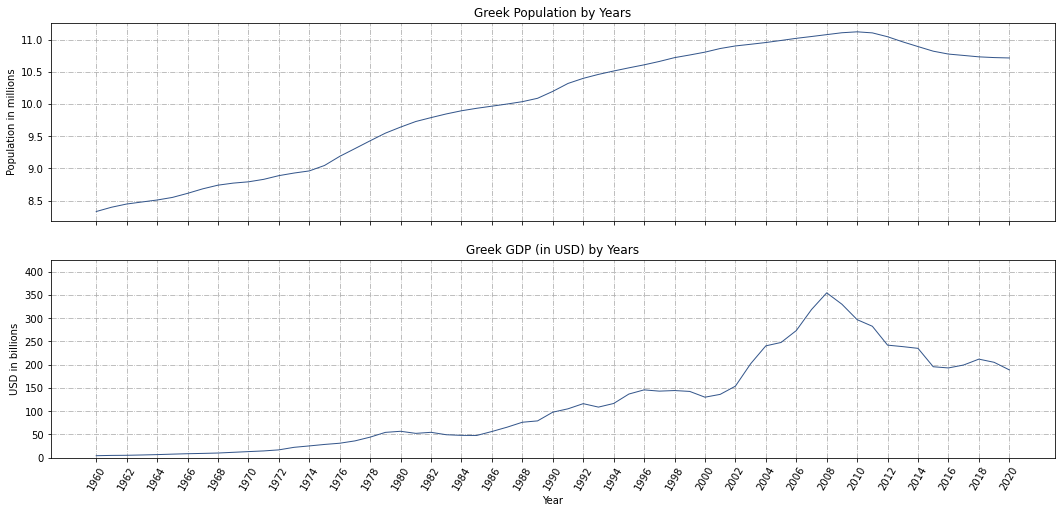

In [11]:
fig, (pop_ax, gdp_ax) = plt.subplots(nrows=2, sharex=True, figsize=(18, 8))

pop_ax.grid(which="major", linestyle="-.")
pop_ax.plot(df["year"], df["pop_in_mil"], linewidth=1, color="#34568b")

pop_ax.set_xticks(ticks=df["year"][::2], labels=df["year"][::2], rotation=60)
pop_ax.set_title("Greek Population by Years")
pop_ax.set_ylabel("Population in millions")

gdp_ax.grid(which="major", linestyle="-.")
gdp_ax.plot(df["year"], df["gdp_in_bil"], linewidth=1, color="#34568b")

gdp_ax.set_xticks(ticks=df["year"][::2], labels=df["year"][::2], rotation=60)
gdp_ax.set_ylim([0, 425])
gdp_ax.set_title("Greek GDP (in USD) by Years")
gdp_ax.set_xlabel("Year")
gdp_ax.set_ylabel("USD in billions")

Getting the slope and intercept of the fitted regression line  
$ y = slope * x + intercept $

In [12]:
pop_slope60, pop_intercept60, *_rest = scipy.stats.linregress(x=df["year"], y=df["pop_in_mil"])
gdp_slope60, gdp_intercept60, *_rest = scipy.stats.linregress(x=df["year"], y=df["gdp_in_bil"])

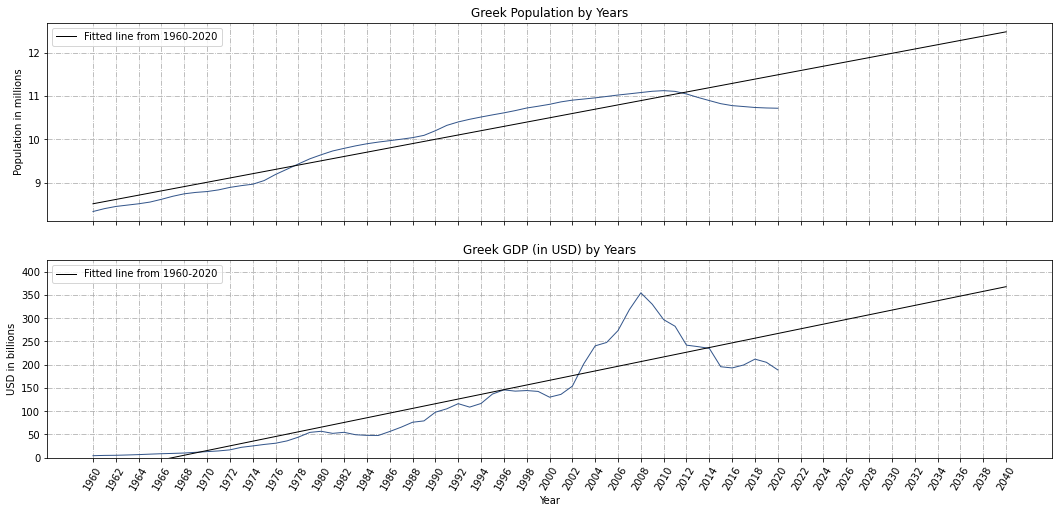

In [13]:
years = range(1960, 2041)

fig, (pop_ax, gdp_ax) = plt.subplots(nrows=2, sharex=True, figsize=(18, 8))

pop_ax.grid(which="major", linestyle="-.")
pop_ax.plot(df["year"], df["pop_in_mil"], linewidth=1, color="#34568b")
pop_ax.plot(years, [pop_slope60 * x + pop_intercept60 for x in years], linewidth=1, color="black", label="Fitted line from 1960-2020")

pop_ax.set_xticks(ticks=years[::2], labels=years[::2], rotation=60)
pop_ax.set_title("Greek Population by Years")
pop_ax.set_ylabel("Population in millions")
pop_ax.legend(loc="upper left")

gdp_ax.grid(which="major", linestyle="-.")
gdp_ax.plot(df["year"], df["gdp_in_bil"], linewidth=1, color="#34568b")
gdp_ax.plot(years, [gdp_slope60 * x + gdp_intercept60 for x in years], linewidth=1, color="black", label="Fitted line from 1960-2020")

gdp_ax.set_xticks(ticks=years[::2], labels=years[::2], rotation=60)
gdp_ax.set_ylim([0, 425])
gdp_ax.set_title("Greek GDP (in USD) by Years")
gdp_ax.set_xlabel("Year")
gdp_ax.set_ylabel("USD in billions")
gdp_ax.legend(loc="upper left")

Calculating fitted regression lines from 1980-2020

In [14]:
pop_slope80, pop_intercept80, *_rest = scipy.stats.linregress(x=df["year"][20:], y=df["pop_in_mil"][20:])
gdp_slope80, gdp_intercept80, *_rest = scipy.stats.linregress(x=df["year"][20:], y=df["gdp_in_bil"][20:])

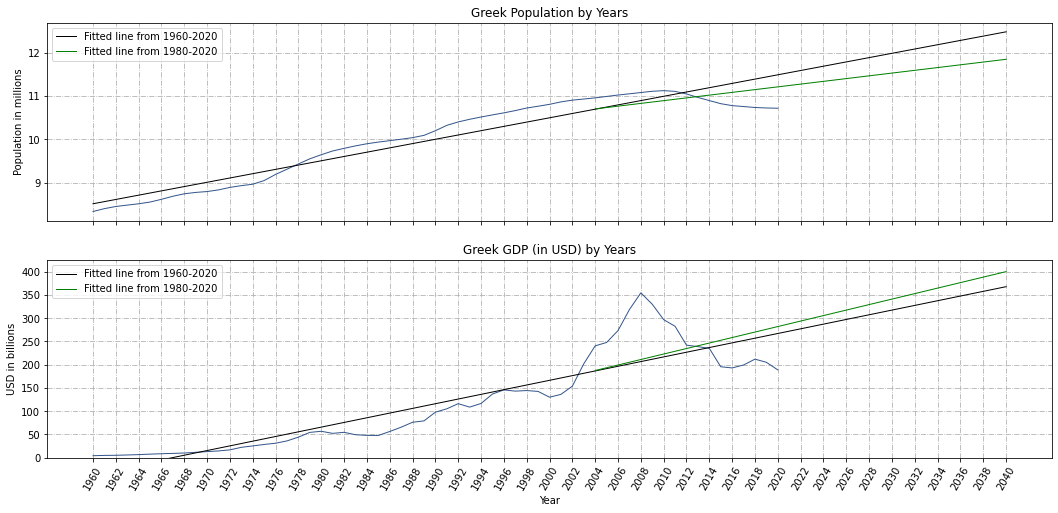

In [15]:
years = range(1960, 2041)

fig, (pop_ax, gdp_ax) = plt.subplots(nrows=2, sharex=True, figsize=(18, 8))

pop_ax.grid(which="major", linestyle="-.")
pop_ax.plot(df["year"], df["pop_in_mil"], linewidth=1, color="#34568b")
pop_ax.plot(years, [pop_slope60 * x + pop_intercept60 for x in years], linewidth=1, color="black",
            label="Fitted line from 1960-2020")
pop_ax.plot(years[44:], [pop_slope80 * x + pop_intercept80 for x in years[44:]], linewidth=1, color="green",
            label="Fitted line from 1980-2020")

pop_ax.set_xticks(ticks=years[::2], labels=years[::2], rotation=60)
pop_ax.set_title("Greek Population by Years")
pop_ax.set_ylabel("Population in millions")
pop_ax.legend(loc="upper left")

gdp_ax.grid(which="major", linestyle="-.")
gdp_ax.plot(df["year"], df["gdp_in_bil"], linewidth=1, color="#34568b")
gdp_ax.plot(years, [gdp_slope60 * x + gdp_intercept60 for x in years], linewidth=1, color="black",
            label="Fitted line from 1960-2020")
gdp_ax.plot(years[44:], [gdp_slope80 * x + gdp_intercept80 for x in years[44:]], linewidth=1, color="green",
            label="Fitted line from 1980-2020")

gdp_ax.set_xticks(ticks=years[::2], labels=years[::2], rotation=60)
gdp_ax.set_ylim([0, 425])
gdp_ax.set_title("Greek GDP (in USD) by Years")
gdp_ax.set_xlabel("Year")
gdp_ax.set_ylabel("USD in billions")
gdp_ax.legend(loc="upper left")

# GDP per capita  
GDP per capita = $ \frac{GDP}{Population} $  
  
Multiplied by 1000 since GDP is in billions, and Population in millions  
  
GDP per capita = $ \frac{GDP * 10^9}{Population * 10^6} = 10^3 * \frac{GDP}{Population}$

In [16]:
df["gdppc"] = 1000 * df["gdp_in_bil"] / df["pop_in_mil"]

In [17]:
df.head()

,year,pop_in_mil,gdp_in_bil,gdppc
0,1960,8.331725,4.335186,520.322744
1,1961,8.398050,4.961400,590.780055
2,1962,8.448233,5.213048,617.057758
3,1963,8.479625,5.895278,695.228624
4,1964,8.510429,6.669673,783.705881


In [18]:
gdppc_slope60, gdppc_intercept60, *_rest = scipy.stats.linregress(x=df["year"], y=df["gdppc"])
gdppc_slope80, gdppc_intercept80, *_rest = scipy.stats.linregress(x=df["year"][20:], y=df["gdppc"][20:])
gdppc_slope08, gdppc_intercept08, *_rest = scipy.stats.linregress(x=df["year"][48:], y=df["gdppc"][48:])
gdppc_slope16, gdppc_intercept16, *_rest = scipy.stats.linregress(x=df["year"][56:60], y=df["gdppc"][56:60])

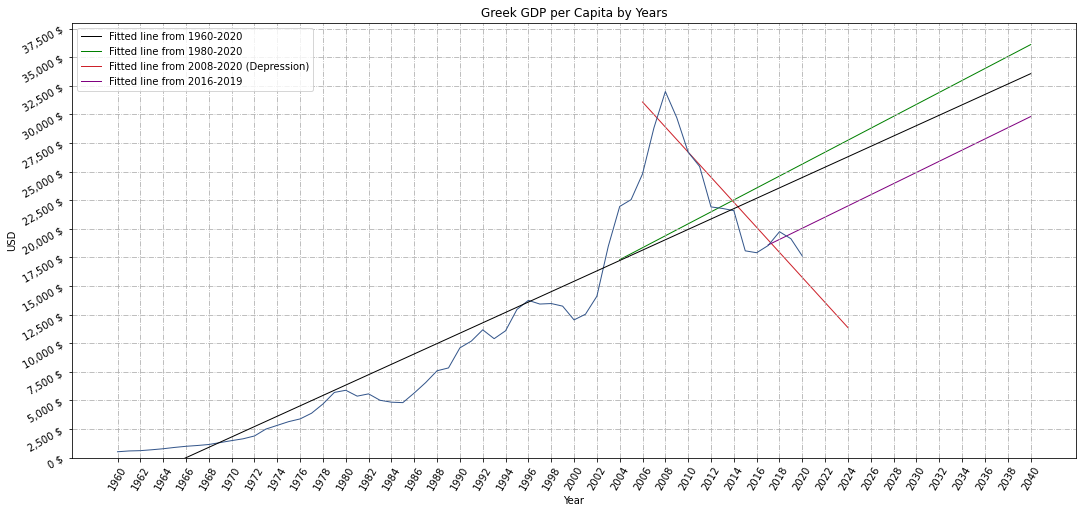

In [19]:
years = range(1960, 2041)

fig, ax = plt.subplots(figsize=(18, 8))

ax.grid(which="major", linestyle="-.")
ax.plot(df["year"], df["gdppc"], linewidth=1, color="#34568b")
ax.plot(years, [gdppc_slope60 * x + gdppc_intercept60 for x in years], linewidth=1, color="black",
        label="Fitted line from 1960-2020")
ax.plot(years[44:], [gdppc_slope80 * x + gdppc_intercept80 for x in years[44:]], linewidth=1, color="green",
        zorder=1, label="Fitted line from 1980-2020")
ax.plot(years[46:65], [gdppc_slope08 * x + gdppc_intercept08 for x in years[46:65]], linewidth=1, color="#cd212a",
        zorder=1, label="Fitted line from 2008-2020 (Depression)")
ax.plot(years[57:], [gdppc_slope16 * x + gdppc_intercept16 for x in years[57:]], linewidth=1, color="purple",
        zorder=1, label="Fitted line from 2016-2019")

ax.set_xticks(ticks=years[::2], labels=years[::2], rotation=60)
ax.set_yticks(ticks=range(0, 38_001, 2_500), labels=[f"{usd:,} $" for usd in range(0, 38_001, 2_500)], rotation=30)
ax.set_ylim([0, 38_000])
ax.set_title("Greek GDP per Capita by Years")
ax.set_xlabel("Year")
ax.set_ylabel("USD")
ax.legend(loc="upper left")